In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Import Dataset
dataset = pd.read_csv('training_data.csv')
X_train=dataset.iloc[:,0:1].values
y_train=dataset.iloc[:,5].values

In [14]:
test_data = pd.read_csv('testing_data.csv')
X_005=test_data.iloc[:,0:1].values
y_005=test_data.iloc[:,5].values

In [26]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

# Import keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# Initializing the ANN
regressor = Sequential()
# Adding the input layer and first hidden layer
regressor.add(Dense(units=2, activation='tanh', input_dim=1))
# Adding the output layer
regressor.add(Dense(units=1, activation='linear'))

# Compiling the ANN
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics= ['mean_absolute_error','accuracy'])

# Fitting the ANN in the Training set
regressor.fit(X_train, y_train, batch_size=1, epochs=2000)
# Predicting the Test set result
y_pred = regressor.predict(X_005)


Epoch 1/2000


468/468 [==============================] - 6s 9ms/step - loss: 0.0888 - mean_absolute_error: 0.2126 - accuracy: 0.0000e+00
Epoch 2/2000
468/468 [==============================] - 3s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.1855 - accuracy: 0.0000e+00
Epoch 3/2000
468/468 [==============================] - 4s 8ms/step - loss: 0.0538 - mean_absolute_error: 0.1842 - accuracy: 0.0000e+00
Epoch 4/2000
468/468 [==============================] - 3s 5ms/step - loss: 0.0521 - mean_absolute_error: 0.1832 - accuracy: 0.0000e+00
Epoch 5/2000
468/468 [==============================] - 4s 9ms/step - loss: 0.0502 - mean_absolute_error: 0.1816 - accuracy: 0.0000e+00
Epoch 6/2000
468/468 [==============================] - 4s 9ms/step - loss: 0.0492 - mean_absolute_error: 0.1800 - accuracy: 0.0000e+00
Epoch 7/2000
468/468 [==============================] - 5s 10ms/step - loss: 0.0486 - mean_absolute_error: 0.1808 - accuracy: 0.0000e+00
Epoch 8/2000
468/468 [=======================

In [30]:
t=[40]
y_pred = regressor.predict(t)
t[0]+=1
y_pred = regressor.predict(t)
print(t)

1/1 [==============================] - 0s 77ms/step
[41]


In [31]:
while(t[0]<165 and y_pred[0][0]>1.3):
    t[0]+=1
    y_pred = regressor.predict(t)

1/1 [==============================] - 0s 63ms/step


In [32]:
rul= t[0]  - 40  
weights = regressor.layers[0].get_weights()[0]
biases = regressor.layers[0].get_weights()[1]

In [41]:
from sklearn.metrics import r2_score
import sklearn
import math
R2= r2_score(y_005, y_pred)
mse = sklearn.metrics.mean_squared_error(y_005, y_pred)
rmse = math.sqrt(mse)

1/1 [==============================] - 0s 61ms/step
[[1.9471226]]


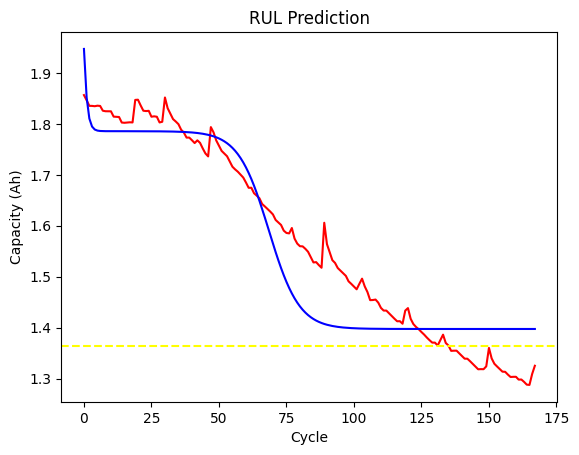

In [42]:
#Visualize
initial_capacity =  regressor.predict([0])
print(initial_capacity)
threshold = initial_capacity*0.7
#Visual results training
plt.plot(0,1.68,color='yellow')
plt.plot(X_005, y_005, color='red')
plt.plot(X_005, y_pred, color='blue')
plt.axhline(threshold, color='yellow', linestyle='--')
plt.title('RUL Prediction')
plt.xlabel('Cycle')
plt.ylabel('Capacity (Ah)')
plt.show()